In [1]:
# Importing the libraries that we will need for the sandpile simulation and visualization

import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

cmap = ListedColormap([
    "#2c3e50",  # 0 — dark
    "#3498db",  # 1 — blue
    "#2ecc71",  # 2 — green
    "#f1c40f",  # 3 — yellow (near critical)
    "#e74c3c"   # 4+ — red (toppling)
])

In [9]:
def plot_grids(grid1, grid2, n):

    fig, axes = plt.subplots(
        1, 2,
        figsize=(12, 4),
        gridspec_kw={'width_ratios': [1, 1]}
    )

    
    im1 = axes[0].imshow(grid1, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[0].set_title("relaxed grid")
    axes[0].set_aspect('equal')
    axes[0].axis('off')

    divider1 = make_axes_locatable(axes[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im1, cax=cax1, ticks=[0,1,2,3,4])

    
    im2 = axes[1].imshow(grid2, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[1].set_title("collapsed area")
    axes[1].set_aspect('equal')
    axes[1].axis('off')

    divider2 = make_axes_locatable(axes[1])
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im2, cax=cax2, ticks=[0,1,2,3,4])

    plt.tight_layout()
    fig.suptitle(f"Iteration {n}", fontsize=14)
    plt.savefig(f"animation/ite_{n:03d}.png", dpi=300)
    plt.close(fig)


In [10]:
def relax(grid):
    q = deque()

    grid_size = grid.shape[0]

    grid_change = np.zeros_like(grid, dtype=int)

    # We start by finding all unstable sites
    unstable = np.argwhere(grid >= 4)
    for i, j in unstable:
        q.append((i, j))

    n = 0 # Will be used to count the number of topplings

    while q:
        i, j = q.popleft()

        if grid[i, j] < 4:
            continue

        grid[i, j] -= 4
        grid_change[i, j] = 1 # Note that this site has toppled

        # Distribute grains to neighbors
        for ni, nj in [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]:
            if 0 <= ni < grid_size and 0 <= nj < grid_size:
                grid[ni, nj] += 1
                if grid[ni, nj] >= 4: # We check if the neighbor becomes unstable, if so we add it to the queue
                    q.append((ni, nj))

        n += 1

        plot_grids(grid, grid_change, n)

    return n, grid_change


In [11]:
def populate(x, array):
    N = array.size
    n4 = int(x * N)

    flat = array.ravel()
    flat[:] = np.random.choice([0,1,2,3], size=N)

    idx = np.random.permutation(N)[:n4]
    flat[idx] = 4

    return n4

(-0.5, 49.5, -0.5, 49.5)

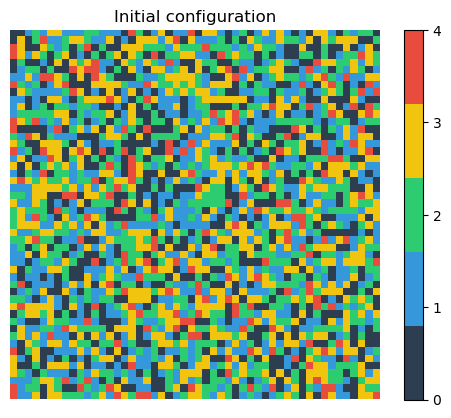

In [12]:
GRID_SIZE = 50

grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

populate(0.08, grid)

plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=4)
plt.colorbar(ticks=[0,1,2,3,4])
plt.title("Initial configuration")
plt.axis('off')

In [13]:
n, grid_change = relax(grid)